# Young People Survey Exploratory Data Analysis

### Import packages to use

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read in the data

In [23]:
df = pd.read_csv("survey.csv")

#### The variables can be split into the following groups:

- Music preferences (19 items)
- Movie preferences (12 items)
- Hobbies & interests (32 items)
- Phobias (10 items)
- Health habits (3 items)
- Personality traits, views on life, & opinions (57 items)
- Spending habits (7 items)
- Demographics (10 items)

#### 1 = The Least and 5 = The most

### Overview

In [30]:
print(df.head())
print(df.shape)

   Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock           ...             Age  \
0      1.0  5.0   5.0                1.0           ...            20.0   
1      2.0  3.0   5.0                4.0           ...            19.0   
2      5.0  3.0   5.0                3.0           ...            20.0   
3      1.0  2.0   2.0                1.0           ...            22.0   
4      3.0  5.0   3.0                1.0           ...            20.0   

   Height  Weight  Number of siblings  Gender  Left - right handed  \
0   163.0    48.0     

#### The data has 1010 rows and 150 columns

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


#### 11 Categorical Variables:
- Alcohol
- Smoking
- Punctuality
- Lying
- Internet usage
- Gender
- Left - right handed
- Education
- Only child
- Village - town
- House - block of flats

#### The rest are either float or integer

# Data Analysis

### Does smoking has relationship with life happiness?
##### Smoking habits has four categories
- Never smoked 
- Tried smoking 
- Former smoker 
- Current smoker

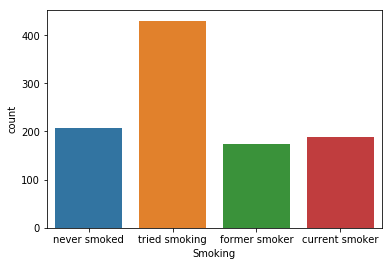

In [62]:
sns.countplot(x = "Smoking", data = df)

From the survey, we observed that more people had tried smoking than never smoked. There are also more smoker than non-smoker in the data.

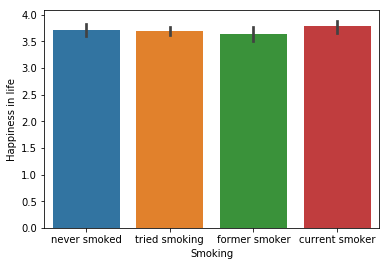

In [67]:
sns.barplot(x = "Smoking", y = "Happiness in life", data = df)

#### Current smoker has the highest score regarding happiness in life, while former smoker has the lowest. In other words, current smokers are the happiest people compared to other groups.

#### However, we need to run formal statistical test to verify the differences are significant.

### Does smoking habits have have relationship with difficulty getting up in the morning?

##### I find it very difficult to get up in the morning.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

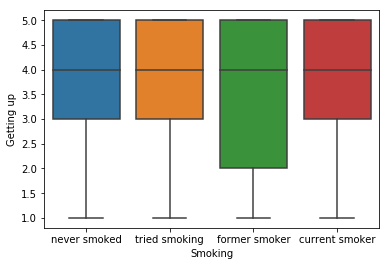

In [76]:
sns.boxplot(x = "Smoking", y = "Getting up", data = df)

#### The median is approximately the same for all groups, but former smokers have higher proportion to disagee with wake up difficulty. Former smoker has the least difficulty getting up compared to others.